In [1]:
#libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#loading data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
#cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Fiter down for BD Data Analyst roles

In [2]:
# only data scientists in the United States
df_DS_US = df[(df['job_title_short'].str.contains('Data Scientist', case=False, na=False)) & (df['job_country'] == 'United States')] .copy()
# drop rows with no salary info
df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])

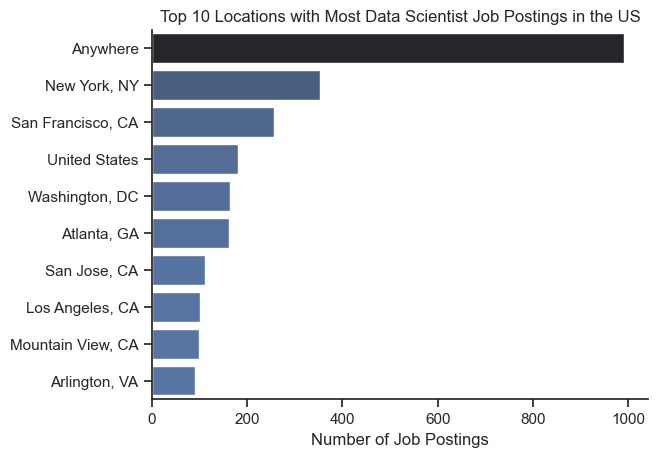

In [5]:
sns.set_theme(style='ticks')
df_plot = df_DS_US['job_location'].value_counts().head(10).to_frame()
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top 10 Locations with Most Data Scientist Job Postings in the US')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()

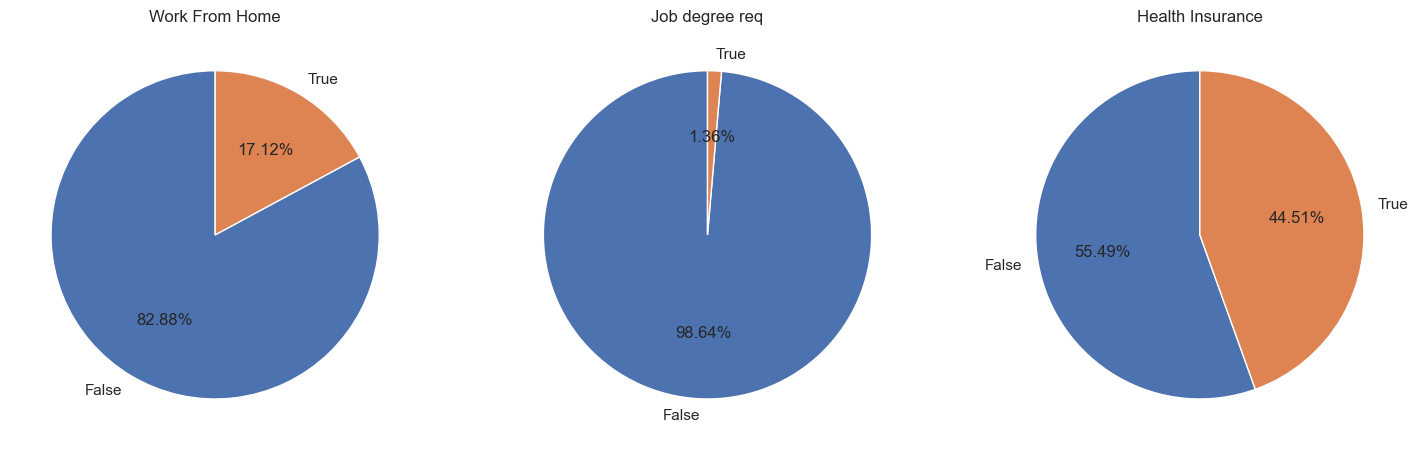

In [6]:
fig, ax = plt.subplots(1,3, figsize=(18,6))
dict_column = {'job_work_from_home':'Work From Home',
                'job_no_degree_mention':'Job degree req',
                'job_health_insurance' :'Health Insurance'}
                
for i, (col, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DS_US[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.2f%%', startangle=90)
    ax[i].set_title(title)
# fig.tight_layout()    

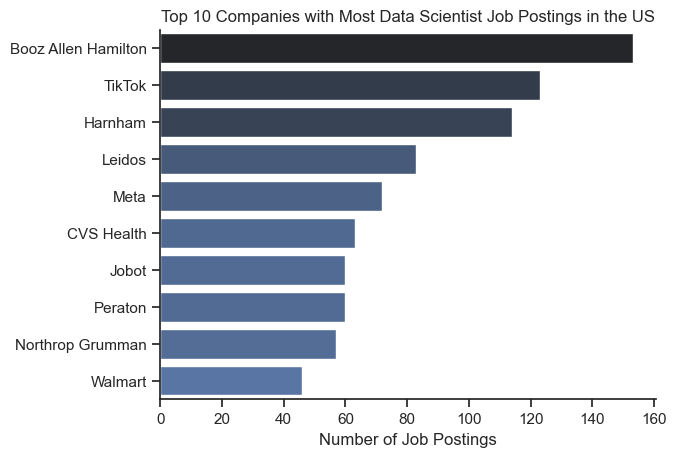

In [8]:
sns.set_theme(style='ticks')
df_plot = df_DS_US['company_name'].value_counts().head(10).to_frame()
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top 10 Companies with Most Data Scientist Job Postings in the US')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()